In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install keras-tcn

     |████████████████████████████████| 1.1 MB 4.3 MB/s 
     |████████████████████████████████| 462 kB 45.8 MB/s 


In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from keras import losses
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input, Dropout, Embedding, LSTM, Flatten, Conv1D, Dense, Flatten, Activation, UpSampling1D, MaxPooling1D, ZeroPadding1D
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.utils.vis_utils import plot_model
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_auc_score, classification_report
from tcn import TCN, tcn_full_summary

import sys
from tqdm import tqdm
import os 
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
 


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_full.csv' , sep = ',')

In [ ]:
list(df.columns)

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain',
 'domain_length',
 'domain_in_ip',
 'server_client_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_dir

0    58000
1    30647
Name: phishing, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


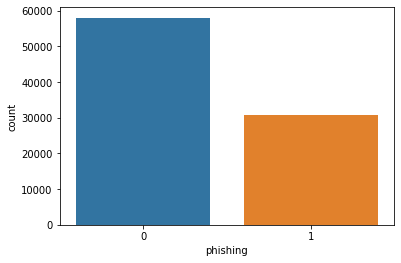

In [ ]:
print(df['phishing'].value_counts())
sns.countplot(df['phishing'])

In [ ]:
df.dtypes == 'int64'
def remove_negatives(df):
    df[df == -1] = 0
remove_negatives(df)

In [ ]:
dataset = df.values
input_x = dataset[:,:-1]
output_x = dataset[:, -1]


In [ ]:
validation_size = 0.25
x_train, x_test, y_train, y_test = train_test_split(input_x , output_x, test_size=validation_size)

In [ ]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)
input_shape = (x_train.shape[1], 1)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(66485, 111, 1)
(22162, 111, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(66485, 111, 1)
y_train:(66485, 2)

x_test:(22162, 111, 1)
y_test:(22162, 2)

input_shape:(111, 1)



In [ ]:
input_layer = Input(shape=(input_shape ))
batch_size, time_steps, input_dim = None, 111, 1

tcn_layer = TCN(input_shape=(time_steps, input_dim),dialations=[8,16,32],kernel_size=3)
m = Sequential([
    tcn_layer,

    Dense(2, activation='softmax')
])

m.compile(loss="binary_crossentropy",
              optimizer="adam",
           metrics=["accuracy"])

In [ ]:
history=m.fit(x_train, y_train,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/100
520/520 [==============================] - 43s 53ms/step - loss: 284.1669 - accuracy: 0.8505 - val_loss: 71.1186 - val_accuracy: 0.8260
Epoch 2/100
520/520 [==============================] - 26s 51ms/step - loss: 23.8697 - accuracy: 0.9021 - val_loss: 13.7388 - val_accuracy: 0.9108
Epoch 3/100
520/520 [==============================] - 27s 51ms/step - loss: 19.6629 - accuracy: 0.9059 - val_loss: 10.0507 - val_accuracy: 0.9130
Epoch 4/100
520/520 [==============================] - 27s 51ms/step - loss: 7.5110 - accuracy: 0.9143 - val_loss: 3.0429 - val_accuracy: 0.9274
Epoch 5/100
520/520 [==============================] - 26s 51ms/step - loss: 4.2864 - accuracy: 0.9153 - val_loss: 1.3839 - val_accuracy: 0.9236
Epoch 6/100
520/520 [==============================] - 27s 51ms/step - loss: 1.1154 - accuracy: 0.9173 - val_loss: 0.5974 - val_accuracy: 0.9267
Epoch 7/100
520/520 [==============================] - 26s 51ms/step - loss: 0.5710 - accuracy: 0.9263 - val_loss: 0.4377 -

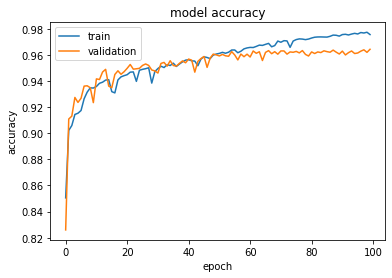

In [ ]:
 # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

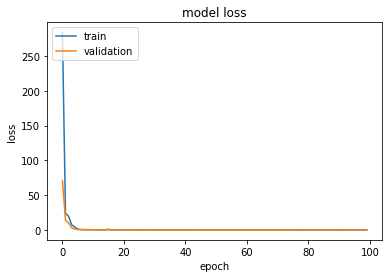

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12891586124897003
Test accuracy: 0.9643082618713379


In [ ]:
preds = m.predict(x_test)
y_pred = np.round(preds)
print(y_pred)
auc = roc_auc_score( y_pred, y_test)
print("AUC: {:.2%}".format (auc))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
AUC: 96.12%


In [ ]:
from sklearn.metrics import confusion_matrix
y_predict=np.argmax(y_pred,axis=-1)
y=np.argmax(y_test,axis=-1)
cnf_matrix = confusion_matrix(y_predict, y)
cnf_matrix

array([[14153,   423],
       [  368,  7218]])

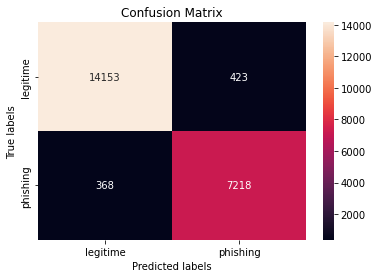

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = ax,fmt="d");
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['legitime','phishing']);
ax.yaxis.set_ticklabels(['legitime','phishing']);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14521
           1       0.95      0.94      0.95      7641

   micro avg       0.96      0.96      0.96     22162
   macro avg       0.96      0.96      0.96     22162
weighted avg       0.96      0.96      0.96     22162
 samples avg       0.96      0.96      0.96     22162



In [ ]:
input_layer = Input(shape=(input_shape ))
batch_size, time_steps, input_dim = None, 111, 1

tcn_layer = TCN(input_shape=(time_steps, input_dim))
m = Sequential([
    tcn_layer,
    Dense(2, activation='softmax')
])

m.compile(loss="binary_crossentropy",
              optimizer="Rmsprop",
           metrics=["accuracy"])

In [ ]:
history=m.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
520/520 [==============================] - 33s 63ms/step - loss: 0.3247 - accuracy: 0.9427 - val_loss: 1.0501 - val_accuracy: 0.9260
Epoch 2/10
520/520 [==============================] - 31s 60ms/step - loss: 0.2758 - accuracy: 0.9435 - val_loss: 0.1812 - val_accuracy: 0.9437
Epoch 3/10
520/520 [==============================] - 30s 57ms/step - loss: 0.2826 - accuracy: 0.9444 - val_loss: 0.1507 - val_accuracy: 0.9459
Epoch 4/10
520/520 [==============================] - 30s 58ms/step - loss: 0.2757 - accuracy: 0.9453 - val_loss: 0.1766 - val_accuracy: 0.9414
Epoch 5/10
520/520 [==============================] - 28s 55ms/step - loss: 0.1985 - accuracy: 0.9437 - val_loss: 0.2307 - val_accuracy: 0.9254
Epoch 6/10
520/520 [==============================] - 29s 56ms/step - loss: 0.2047 - accuracy: 0.9440 - val_loss: 0.2231 - val_accuracy: 0.9240
Epoch 7/10
520/520 [==============================] - 29s 56ms/step - loss: 0.4072 - accuracy: 0.9450 - val_loss: 0.2669 - val_accuracy:

In [ ]:
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4057694673538208
Test accuracy: 0.9246006608009338


In [ ]:
preds = m.predict(x_test)
y_pred = np.round(preds)
print(y_pred)
auc = roc_auc_score( y_pred, y_test)
print("AUC: {:.2%}".format (auc))

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
AUC: 91.17%


In [ ]:
from sklearn.metrics import confusion_matrix
y_predict=np.argmax(y_pred,axis=-1)
y=np.argmax(y_test,axis=-1)
cnf_matrix = confusion_matrix(y_predict, y)
cnf_matrix

array([[13173,   433],
       [ 1238,  7318]])

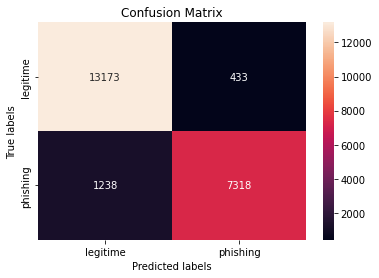

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = ax,fmt="d");
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['legitime','phishing']);
ax.yaxis.set_ticklabels(['legitime','phishing']);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     14411
           1       0.86      0.94      0.90      7751

   micro avg       0.92      0.92      0.92     22162
   macro avg       0.91      0.93      0.92     22162
weighted avg       0.93      0.92      0.93     22162
 samples avg       0.92      0.92      0.92     22162



In [ ]:
input_layer = Input(shape=(input_shape ))
batch_size, time_steps, input_dim = None, 111, 1

tcn_layer = TCN(input_shape=(time_steps, input_dim))
m = Sequential([
    tcn_layer,
    Dense(2, activation='softmax')
])

m.compile(loss="binary_crossentropy",
              optimizer="Adamax",
           metrics=["accuracy"])

In [ ]:
history=m.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
520/520 [==============================] - 32s 53ms/step - loss: 232.3745 - accuracy: 0.8234 - val_loss: 100.1784 - val_accuracy: 0.8482
Epoch 2/10
520/520 [==============================] - 27s 52ms/step - loss: 63.5682 - accuracy: 0.8812 - val_loss: 28.1329 - val_accuracy: 0.9066
Epoch 3/10
520/520 [==============================] - 27s 52ms/step - loss: 49.4447 - accuracy: 0.8954 - val_loss: 28.5600 - val_accuracy: 0.9089
Epoch 4/10
520/520 [==============================] - 27s 52ms/step - loss: 31.6431 - accuracy: 0.8992 - val_loss: 24.4404 - val_accuracy: 0.9099
Epoch 5/10
520/520 [==============================] - 27s 52ms/step - loss: 21.2152 - accuracy: 0.9022 - val_loss: 8.2460 - val_accuracy: 0.9140
Epoch 6/10
520/520 [==============================] - 27s 52ms/step - loss: 12.6267 - accuracy: 0.9039 - val_loss: 10.0661 - val_accuracy: 0.9108
Epoch 7/10
520/520 [==============================] - 32s 61ms/step - loss: 8.8299 - accuracy: 0.9102 - val_loss: 11.5963 -

In [ ]:
score = m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.238863706588745
Test accuracy: 0.9108383655548096


In [ ]:
preds = m.predict(x_test)
y_pred = np.round(preds)
print(y_pred)
auc = roc_auc_score( y_pred, y_test)
print("AUC: {:.2%}".format (auc))

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
AUC: 89.67%


In [ ]:
from sklearn.metrics import confusion_matrix
y_predict=np.argmax(y_pred,axis=-1)
y=np.argmax(y_test,axis=-1)
cnf_matrix = confusion_matrix(y_predict, y)
cnf_matrix

array([[12745,   310],
       [ 1666,  7441]])

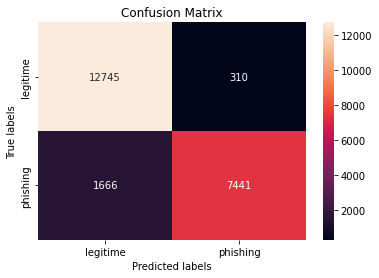

In [ ]:
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, ax = ax,fmt="d");
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['legitime','phishing']);
ax.yaxis.set_ticklabels(['legitime','phishing']);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     14411
           1       0.82      0.96      0.88      7751

   micro avg       0.91      0.91      0.91     22162
   macro avg       0.90      0.92      0.91     22162
weighted avg       0.92      0.91      0.91     22162
 samples avg       0.91      0.91      0.91     22162

